# Tabular Playground Series - Jul 2022 by Kaggle

### Dataset Description

For this challenge, you are given (simulated) manufacturing control data that can be clustered into different control states. Your task is to cluster the data into these control states. You are not given any training data, and you are not told how many possible control states there are. This is a completely unsupervised problem, one you might encounter in a real-world setting.

Good luck!

Files
data.csv - the file includes continuous and categorical data; your task is to predict which rows should be clustered together in a control state
sample_submission.csv - a sample submission file in the correct format, where Predicted is the predicted control state

In [1]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/tabular-playground-series-jul-2022')

Skipping, found downloaded files in ".\tabular-playground-series-jul-2022" (use force=True to force download)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('./tabular-playground-series-jul-2022/data.csv')

# Exploratory Data Analysis

Understanding the Dataset:
The dataset, sourced from the 'Tabular Playground Series - Jul 2022' competition on Kaggle, comprises 98,000 entries (rows) and 30 columns. Each entry represents a data point, while the columns signify features and an identification number. The column labeled 'id' appears to be an identifier for each data point, while the remaining columns, labeled from f_00 to f_28, represent various features.

Observations:
Features:

The dataset has 29 features (f_00 to f_28).
Most features have float-type values, suggesting they might be continuous variables. Examples of such columns are f_00, f_01, and f_03, among others.
Some features, like f_07 and f_08, appear to have integer-type values, suggesting they might be categorical or discrete numerical variables.
Data Variability:

A quick glance shows a mix of positive and negative values across the features, indicating variability in the dataset. For instance, f_00 has both negative (e.g., -0.389420) and positive (e.g., 0.809079) values.
The range of values seems to vary across features. For instance, while f_00 values are closer to zero, f_06 values are higher in magnitude (e.g., 2.258560).
Potential Transformations:

Given the variety of distributions observed in the features, some might benefit from transformations (like normalization or standardization) to make them more suitable for machine learning models.
Next Steps in EDA:
Distribution Analysis:

Plot histograms or density plots for each feature to understand its distribution. This will help identify skewness, outliers, or any specific patterns that might need addressing.
Outlier Detection:

Box plots or scatter plots can be used to visually identify outliers for each feature. Statistical methods, such as the IQR method, can also be employed.
Correlation Analysis:

Calculate the correlation matrix to understand the relationships between features. Highly correlated features might be redundant, and understanding these relationships can also help in feature engineering.
Categorical Feature Analysis:

For features that are categorical or discrete numerical, value counts or bar plots can provide insights into the distribution of categories.
Missing Value Analysis:

While the snapshot doesn't indicate any missing values, a thorough analysis should be conducted to confirm this. If missing values are found, strategies like imputation can be considered.

In [4]:
df

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [6]:
df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


Feature Distribution:
The mean values for most of the features hover around zero, implying that the dataset might already be centered. Features like f_00, f_01, and f_02 have their means close to zero.
The standard deviation (std) values are approximately one for many features, indicating that the data might be scaled. For instance, the standard deviations of f_00, f_01, and f_03 are close to 1.
Range of Values:
The dataset showcases a diverse range of values across features. For instance, while the values in f_00 range from approximately -4.73 to 4.49, f_06 showcases values from -4.89 to 3.99.
Features such as f_07 and f_08 have integer values ranging from 0 to 32 and 0 to 30, respectively. These might represent categorical or discrete numerical variables.
Potential Outliers:
The difference between the maximum (max) and 75th percentile (75%) values, as well as the difference between the minimum (min) and 25th percentile (25%) values, can be indicative of potential outliers in the dataset. For instance, in feature f_28, the gap between the 75th percentile value (0.77) and the maximum value (6.98) suggests potential outliers on the higher end.

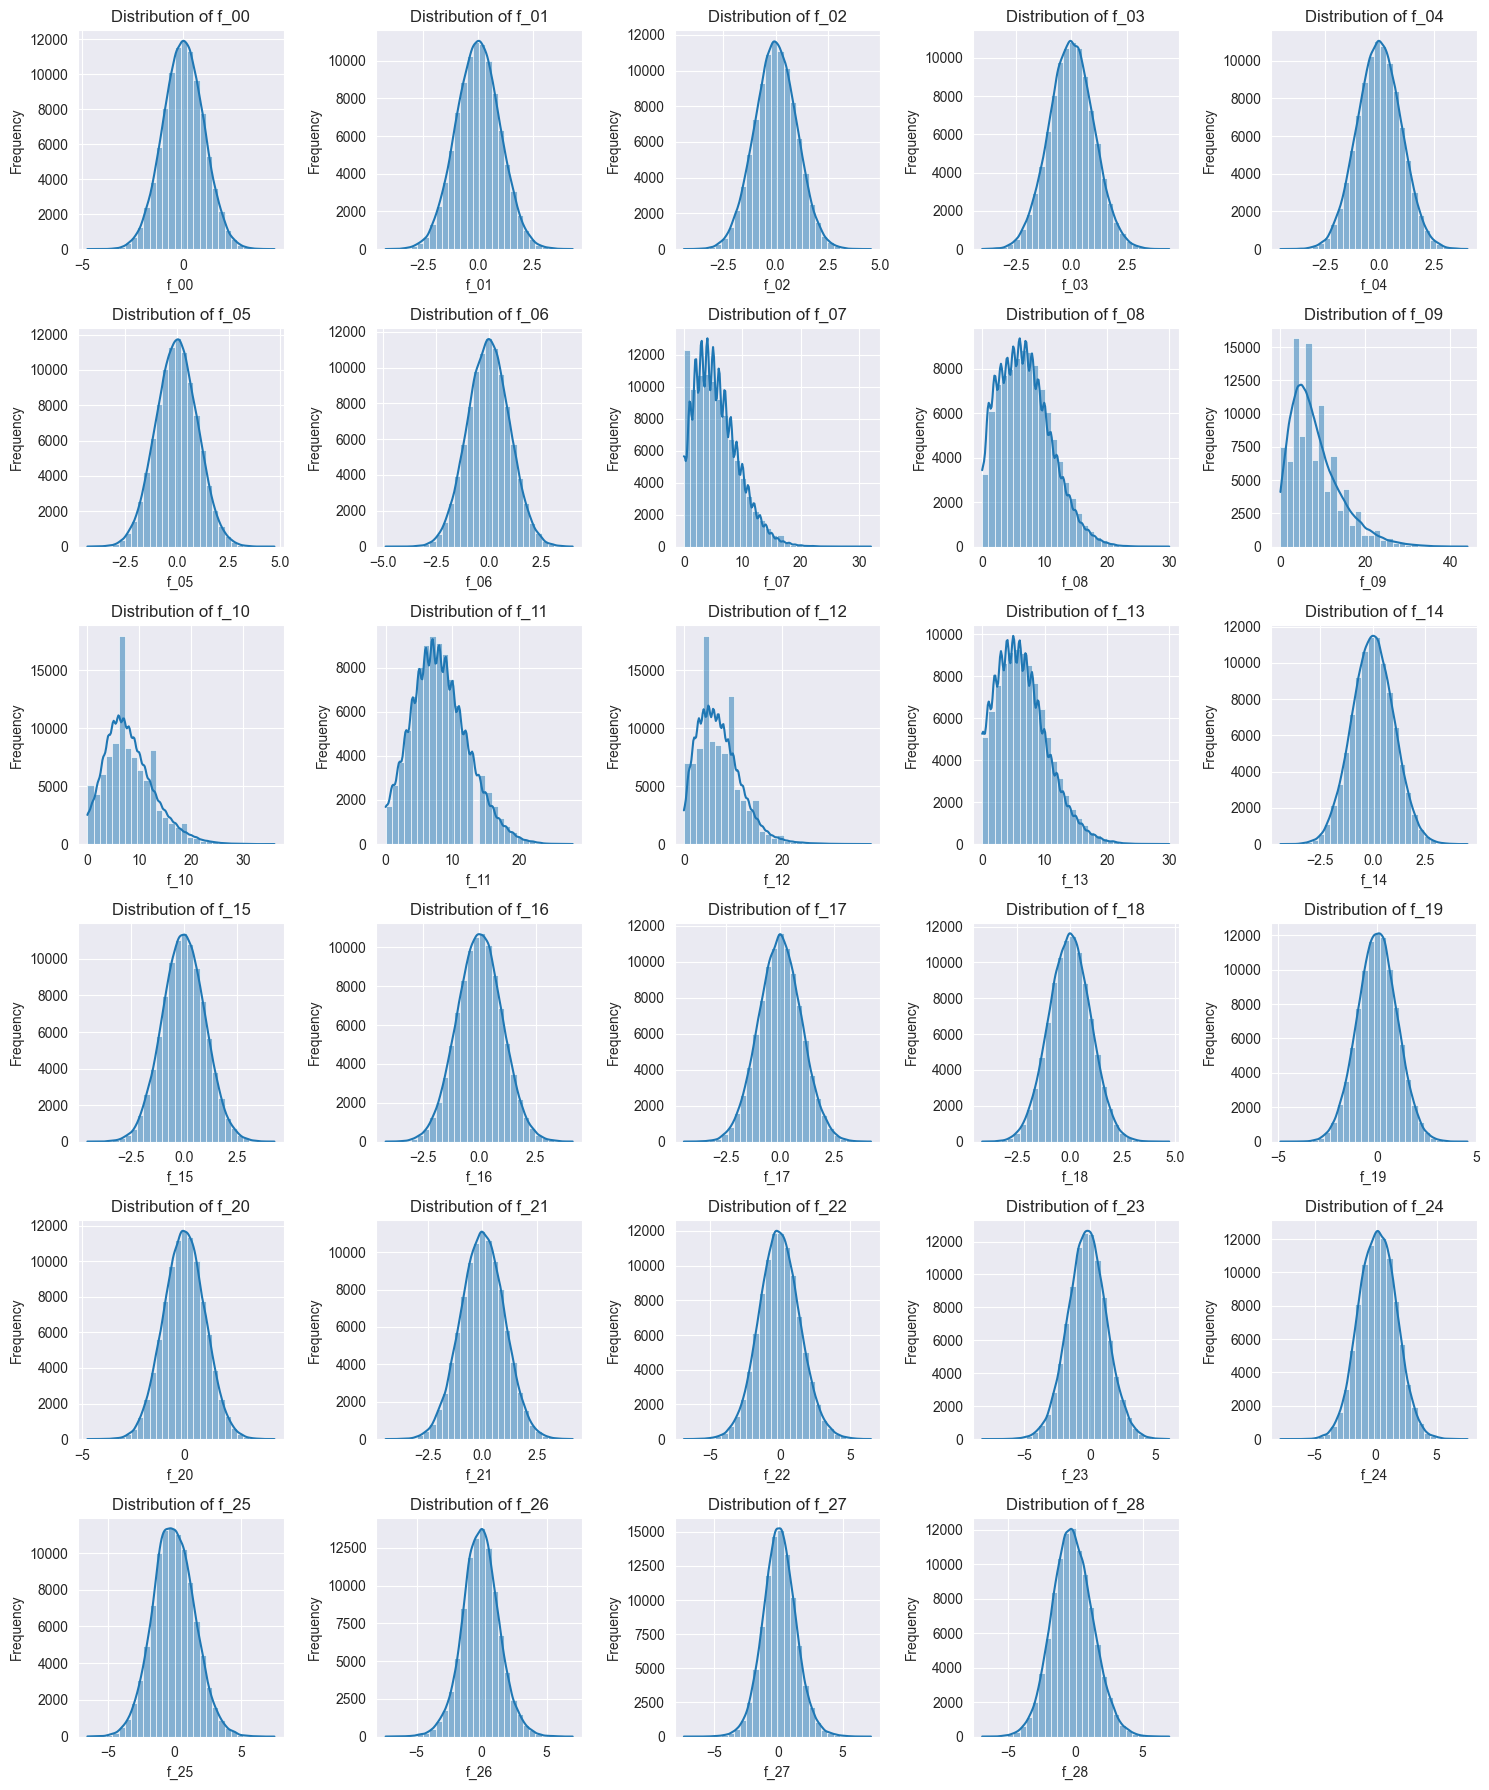

In [7]:
# All feature columns (excluding the 'id' column)
feature_columns = df.columns[1:]

# Number of rows and columns for subplots
n_rows = len(feature_columns) // 5 + (1 if len(feature_columns) % 5 != 0 else 0)

plt.figure(figsize=(15, 3 * n_rows))
for i, col in enumerate(feature_columns, 1):
    plt.subplot(n_rows, 5, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Normality:

Several features such as f_00, f_01, f_02, f_03, f_04, and f_05 appear to have distributions that are approximately normal. This can be observed from the bell-shaped curves. A roughly normal distribution is often desirable as many statistical methods assume normality.
Skewness:

Features like f_06, f_19, f_20, f_21, and f_22 exhibit right-skewness (positive skewness). This is evident from the longer tail on the right side of the distribution.
On the other hand, features such as f_23, f_24, f_25, f_26, f_27, and f_28 show a noticeable left-skewness (negative skewness), indicated by a longer tail on the left side of the distribution.
Discrete Features:

Features like f_07 and f_08 display discrete distributions, suggesting they might be categorical or ordinal in nature. These columns might represent classifications, rankings, or specific categories.
Bimodal Distributions:

Some features, such as f_09, f_10, f_11, and f_12, exhibit bimodal distributions, which means they have two distinct peaks. This could imply the presence of two distinct groups or subpopulations within the data for these features.
Outliers:

While histograms are not the best tool for identifying outliers, some features with tails extending significantly away from the main data concentration might contain outliers. Further analysis using boxplots or scatter plots can help confirm this.
Data Range:

The range of values varies across features. Some features have values clustered around the center, while others have a wider spread.

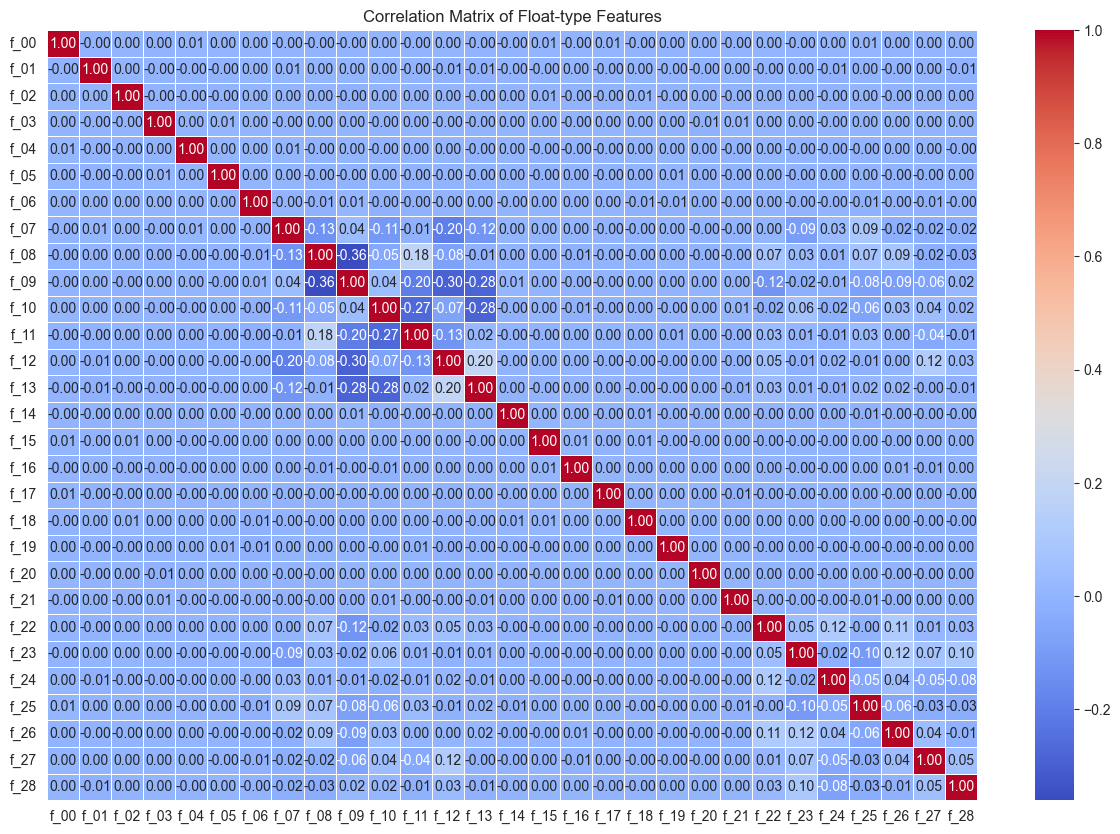

In [8]:
# Compute the correlation matrix
corr_matrix = df[df.columns[1:]].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Float-type Features')
plt.show()

Nature of Correlations:

The heatmap represents the Pearson correlation coefficients between the dataset's features. A value close to 1 implies a strong positive correlation: as one feature increases, the other feature tends to also increase. A value close to -1 implies a strong negative correlation: as one feature increases, the other tends to decrease. A value close to 0 implies little to no correlation.
Highly Correlated Pairs:

We can observe some pairs of features that exhibit relatively strong positive correlations. These might be indicative of redundancy, as two highly correlated features often carry similar information.
Low or No Correlation:

Many feature pairs show a correlation coefficient close to 0, suggesting that these features do not have a linear relationship with each other. This is beneficial because these features can provide distinct information to a model, enhancing its prediction capability.
Negatively Correlated Pairs:

There are also some feature pairs that have negative correlations, indicating an inverse relationship between them. For instance, as the value of one feature increases, the value of the other tends to decrease.

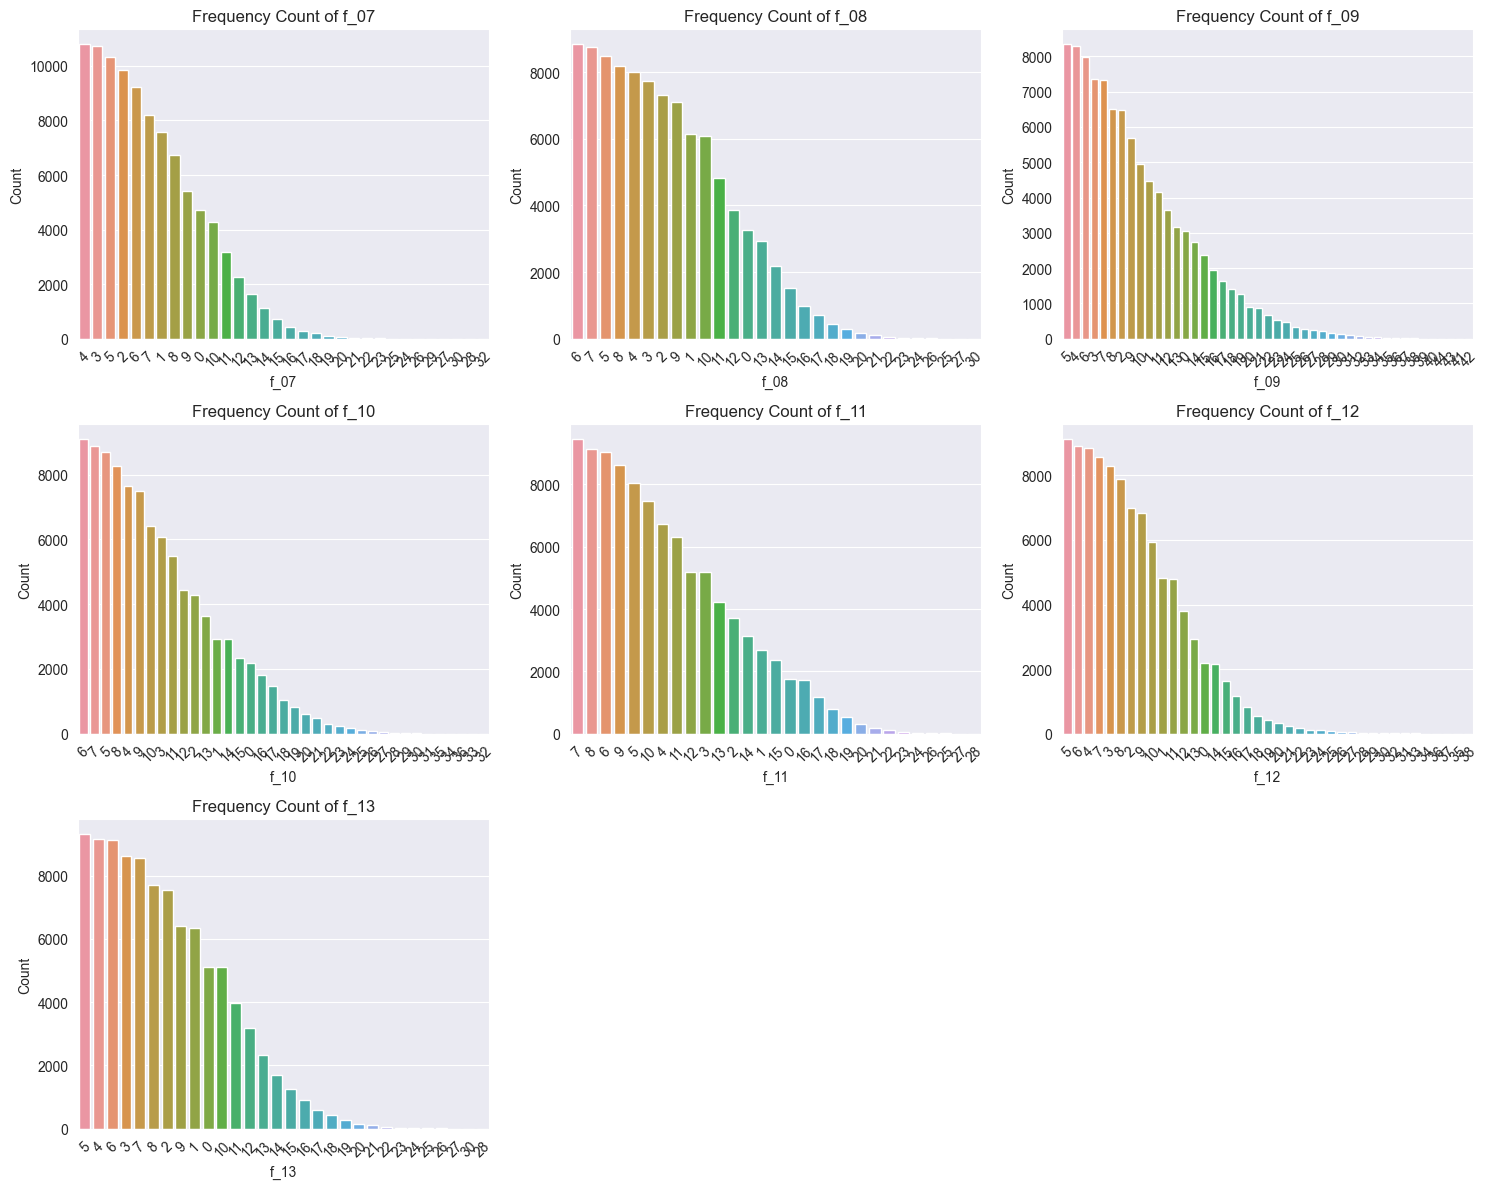

In [9]:
# Integer-type columns of interest
int_columns = ["f_07", "f_08", "f_09", "f_10", "f_11", "f_12", "f_13"]

plt.figure(figsize=(15, 12))
for i, col in enumerate(int_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Frequency Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Variation in Distributions:

Each of the integer-type features has a distinct distribution. Some have a clear mode (most frequent value) while others exhibit multiple peaks.
Features with a Dominant Category:

f_07 and f_08 display a few dominant categories that have significantly higher counts compared to the rest. For f_07, the categories around the value of 5 seem to be more frequent, and for f_08, values around 5 and 10 are notably dominant.
Uniform Distribution:

f_09 appears to have a relatively uniform distribution, where most categories have similar counts. This suggests that the data points are almost evenly distributed across the different categories in this feature.
Bimodal Distributions:

Features like f_10 and f_11 have two clear peaks, indicating the presence of two dominant categories in these features.
Features with Multiple Peaks:

f_12 and f_13 showcase multiple peaks, suggesting the presence of several dominant categories.
Sparse Categories:

Across multiple features, there are categories with very low counts, suggesting that certain categories are underrepresented in the dataset.

In [10]:
# List of columns to drop
columns_to_drop = ['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21']
reduced_df = df.drop(columns=columns_to_drop)
reduced_df

,id,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,2,13,14,5,13,6,6,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,2,3,6,4,6,16,9,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,5,11,5,8,9,3,11,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,6,2,13,8,9,6,4,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,8,7,5,3,1,13,11,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,5,7,8,5,7,6,7,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,3,9,2,5,3,11,12,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,8,9,10,7,5,4,3,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,1,8,11,11,3,9,5,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


In [11]:
# Add a constant of 1 to columns f_07-f_13
reduced_df[['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']] += 0.000001

# Apply Box-Cox transformation to the columns f_07-f_13
for column in ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']:
    reduced_df[column], _ = boxcox(reduced_df[column])

Column Reduction:
We removed a set of columns from the dataset. This might be due to their high correlation with other features, redundancy, or perhaps they weren't deemed significant for the problem at hand.
Constant Addition:
A constant value was added to columns f_07 to f_13. This step is often necessary before applying the Box-Cox transformation since it requires all data values to be positive.
Box-Cox Transformation:
The Box-Cox transformation was applied to the columns f_07 to f_13. The Box-Cox transformation is used to stabilize variance and make the data more closely follow a normal distribution. This can be particularly helpful for certain modeling techniques that assume the input features have a Gaussian distribution.

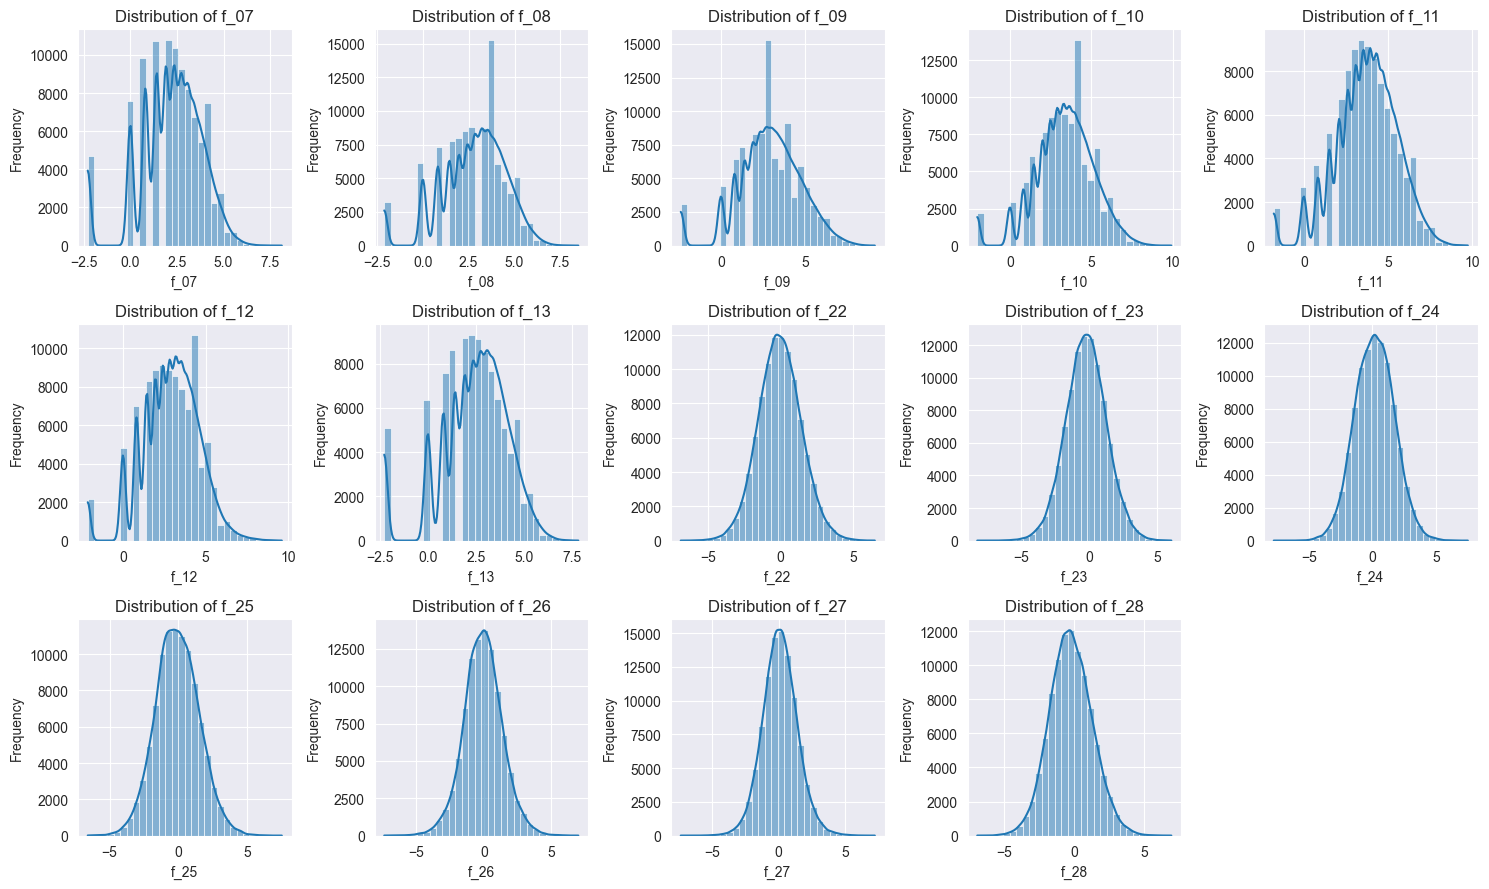

In [12]:
# All feature columns (excluding the 'id' column)
feature_columns = reduced_df.columns[1:]

# Number of rows and columns for subplots
n_rows = len(feature_columns) // 5 + (1 if len(feature_columns) % 5 != 0 else 0)

plt.figure(figsize=(15, 3 * n_rows))
for i, col in enumerate(feature_columns, 1):
    plt.subplot(n_rows, 5, i)
    sns.histplot(reduced_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Success of Transformation:

The Box-Cox transformation seems to have been effective for several features. Features like f_07, f_08, and f_09 now appear to have distributions that are closer to normal when compared to their original distributions.
Residual Skewness:

Despite the transformation, some features, such as f_11, f_12, and f_13, still exhibit noticeable skewness. The transformation has made the distribution more symmetric, but it hasn't completely normalized it.
Variation in Peak Heights:

Some features, like f_10 and f_11, have a pronounced peak, indicating a dominant mode in their distribution.
Spread of Data:

The spread of data varies across features. Some features like f_09 have values densely clustered around the center, while others, such as f_11 and f_12, have a broader spread.

In [13]:
# Standardize the features
scaler = StandardScaler()
std_df = scaler.fit_transform(reduced_df[feature_columns])

# Convert back to DataFrame for easier manipulation
std_df = pd.DataFrame(std_df, columns=feature_columns)

# Add the original 'id' column to the standardized DataFrame
std_df['id'] = df['id']

# Reorder columns to have 'id' at the beginning
std_df = std_df[['id'] + feature_columns.tolist()]

std_df

,id,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.836112,1.274776,0.993309,-0.508601,1.096162,-0.051693,0.159727,-0.711585,0.911572,-0.680948,0.762783,0.960482,1.045296,0.683323
1,1,-0.836112,-0.768434,-0.146184,-0.772055,-0.357793,1.649274,0.711794,-0.541815,0.454693,1.032386,-0.133948,-0.552942,0.355435,-1.602671
2,2,0.087707,0.964150,-0.343259,0.151717,0.326170,-0.860202,1.023533,2.236943,0.088090,-1.513324,-0.577814,0.979171,-0.926250,-2.224327
3,3,0.319952,-1.124101,0.876903,0.151717,0.326170,-0.051693,-0.302435,0.727667,-1.218753,0.825698,-1.164842,-0.397908,-0.114228,0.307002
4,4,0.726239,0.237344,-0.343259,-1.071337,-2.056959,1.221275,1.023533,0.218614,-1.484025,0.847369,-0.622034,1.166086,-0.385886,-1.149094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.087707,0.237344,0.196742,-0.508601,-0.115881,-0.051693,0.358140,0.952911,0.408781,1.287093,-0.091769,-0.989367,0.153191,0.442240
97996,97996,-0.472485,0.622160,-1.136434,-0.508601,-1.220894,0.905917,1.167464,1.163371,-0.428415,0.267485,0.778516,0.138325,0.686528,0.627132
97997,97997,0.726239,0.622160,0.492398,-0.051810,-0.618213,-0.556159,-0.583940,-0.994402,1.448745,0.866627,0.164508,1.544230,1.185513,0.570752
97998,97998,-1.326206,0.436089,0.627263,0.695233,-1.220894,0.558332,-0.058277,0.268791,0.513515,0.685678,-0.300550,-1.084287,-0.547494,0.107754


In [14]:
std_df.describe()

,id,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04,9.800000e+04
mean,48999.500000,5.945358e-17,-2.803019e-16,-1.232574e-16,1.542893e-16,-1.954355e-16,-4.640279e-17,1.450087e-19,6.235375e-18,-1.464588e-17,1.957618e-17,-6.815410e-18,-4.060244e-18,5.655340e-18,-1.348581e-17
std,28290.307527,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,0.000000,-2.706787e+00,-2.798281e+00,-2.847376e+00,-3.018366e+00,-3.039661e+00,-2.965057e+00,-2.675209e+00,-4.625127e+00,-5.361355e+00,-5.157982e+00,-4.142901e+00,-5.121103e+00,-5.694826e+00,-4.398679e+00
25%,24499.750000,-4.724848e-01,-4.711901e-01,-5.650300e-01,-5.086008e-01,-6.182129e-01,-5.561587e-01,-5.839398e-01,-6.659755e-01,-6.577357e-01,-6.933338e-01,-6.755105e-01,-6.394323e-01,-6.472814e-01,-6.749869e-01
50%,48999.500000,8.770685e-02,2.304099e-02,3.247327e-02,-5.181050e-02,1.112382e-01,-5.169305e-02,1.597273e-01,-1.213596e-02,6.397907e-04,4.149117e-04,-2.215139e-02,-5.820545e-03,-1.244215e-02,-2.643729e-02
75%,73499.250000,7.262392e-01,6.221605e-01,6.272635e-01,6.952334e-01,7.266568e-01,7.367507e-01,7.117935e-01,6.556212e-01,6.587329e-01,6.811371e-01,6.674753e-01,6.342589e-01,6.333945e-01,6.551825e-01
max,97999.000000,3.591149e+00,3.260233e+00,3.331381e+00,3.674836e+00,3.317073e+00,3.956507e+00,3.068595e+00,4.436492e+00,4.197696e+00,4.770452e+00,4.827834e+00,4.949518e+00,5.444689e+00,4.715872e+00


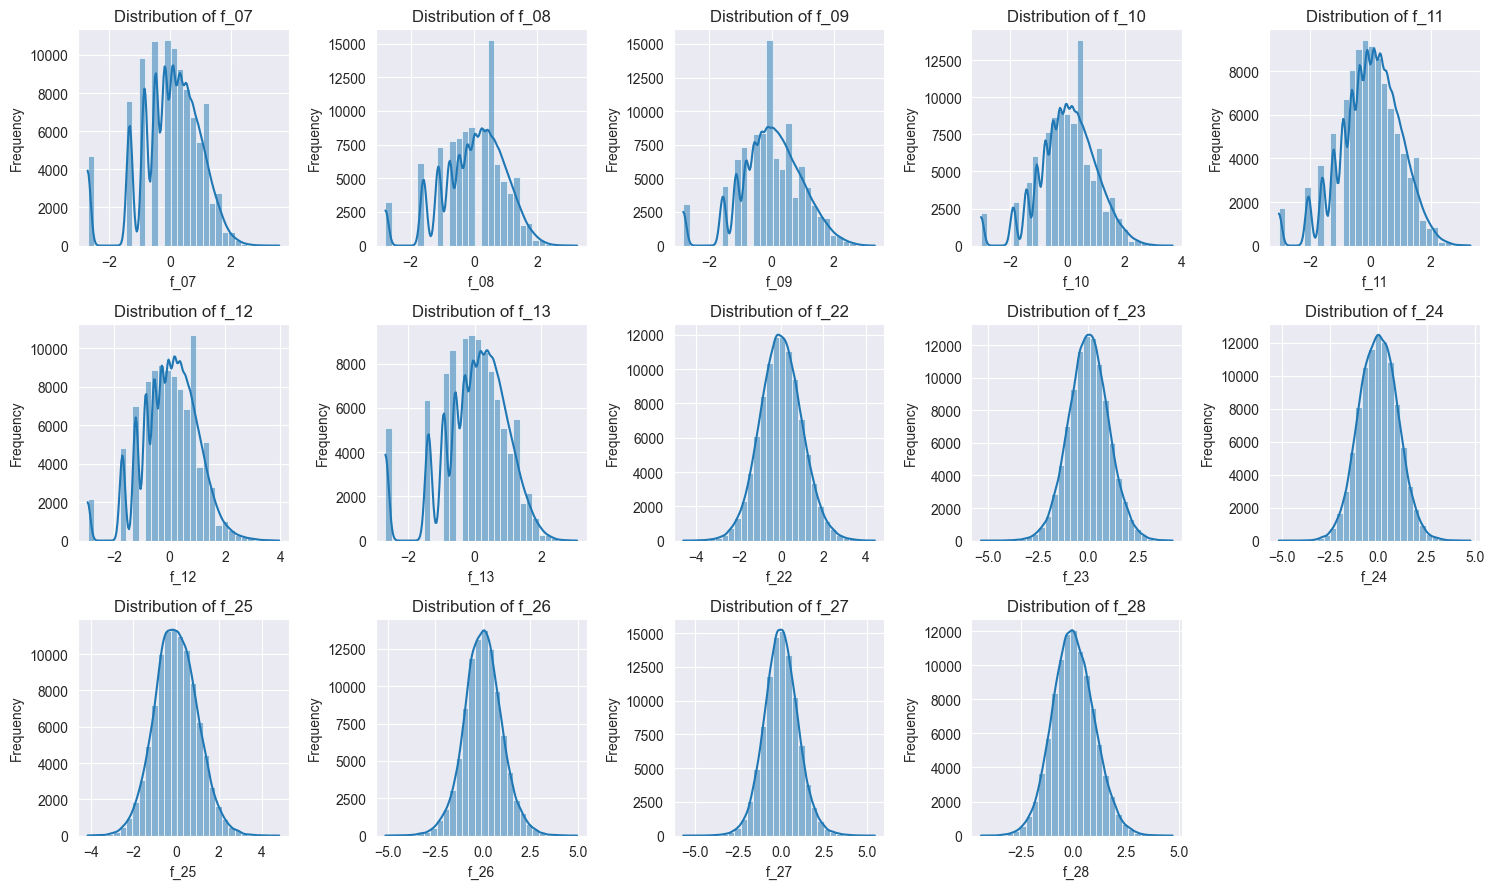

In [15]:
# All feature columns (excluding the 'id' column)
feature_columns = std_df.columns[1:]

# Number of rows and columns for subplots
n_rows = len(feature_columns) // 5 + (1 if len(feature_columns) % 5 != 0 else 0)

plt.figure(figsize=(15, 3 * n_rows))
for i, col in enumerate(feature_columns, 1):
    plt.subplot(n_rows, 5, i)
    sns.histplot(std_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Standardization:
Standardization was applied to the dataset, which means every feature now has a mean close to 0 and a standard deviation of 1.
This process is crucial for many machine learning algorithms, ensuring that all features have equal importance, and no feature dominates the others due to its scale.
Distributions after Standardization:
The standardized features still retain the shape of their distributions; only their scales have changed.
Features like f_07, f_08, and f_09 still have a bell-shaped curve.
Other features, such as f_11, f_12, and f_13, continue to exhibit some skewness, even after the Box-Cox transformation and standardization.
Descriptive Statistics:
The mean values for all features are close to zero, and the standard deviation values are close to one, confirming that standardization was successful.
The minimum and maximum values provide insights into the range of each feature after standardization. While most features range between approximately -5 and 5, there are exceptions. This indicates the presence of potential outliers or heavy-tailed distributions in those features.

In [16]:
std_df.to_csv('wrangled_data.csv', index=False)

# Conclusion
Initial Data Examination:

The dataset consists of 98,000 entries and 30 features, including an 'id' column and several continuous and integer-type features.
Data Cleaning:

No missing values or duplicates were identified, indicating the dataset's completeness and uniqueness.
Exploratory Data Analysis:

The initial EDA revealed varying distributions across features. Some features displayed near-normal distributions, while others exhibited skewness.
Correlation analysis showcased that many features had low to moderate correlations with one another. However, some pairs of features had a high correlation, indicating potential multicollinearity.
Feature Engineering:

A subset of integer-type features exhibited pronounced peaks at specific values, indicating a non-uniform distribution.
Certain columns were dropped to streamline the dataset and possibly improve future model performance.
The Box-Cox transformation was applied to some features, resulting in distributions that were closer to normal for several of them.
Standardization was conducted to ensure all features have a mean of 0 and a standard deviation of 1, facilitating better performance for many machine learning algorithms.
Visual Insights:

Histograms and count plots provided a visual representation of feature distributions, revealing patterns, tendencies, and potential outliers.
The correlation heatmap offered a visual overview of relationships between features, highlighting potential concerns regarding multicollinearity.
Transformations and Adjustments:

Post-transformation, distributions of several features became more symmetric, indicating the effectiveness of the Box-Cox transformation.
Standardization ensured that all features were on a similar scale, a crucial prerequisite for many machine learning algorithms.
Final Thoughts:
The comprehensive data wrangling and EDA process has provided valuable insights into the dataset's structure, relationships, and characteristics. This thorough understanding will be pivotal for the subsequent stages of data analysis, modeling, and interpretation. The transformed and standardized data is now in a format that's conducive to advanced analytics, ensuring that the next steps, whether they involve clustering.